<a href="https://colab.research.google.com/github/dion21001/machine_Learning/blob/main/Computer_vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
class Neuron(object):
  def __init__(self,num_inputs,activation_fn):
    # Randomly iniatializing the weight vector and bias value:
    self.W =np.random.rand(num_inputs)
    self.b =np.random.rand(1)
    self.activation_fn =activation_fn
  def forward(self,x):
    """ Forward the input signal through the neuron."""
    z =np.dot(x,self.W)+self.b
    return self.activation_function(z)

In [ ]:
# Fixing the random number generator seed for reproducible result :
np.random.seed(42)

# random input column array of 3 values (shape =(1,3))
x =np.random.rand(3).reshape(1,3)
step_fn =lambda y:0 if y<=0 else 1
perceptron =Neuron(num_inputs =x.size,activation_fn=step_fn)
perceptron.W,perceptron.b

(array([0.59865848, 0.15601864, 0.15599452]), array([0.05808361]))

In [ ]:
import numpy as np

class FullyConnectedLayer(object):
  def __init__(self,num_inputs,layer_size,activation_fn):
    super().__init__()
    # Randomly initializing the parameters(using a normal distribution this time)
    self.W =np.random.standard_normal((num_inputs,layer_size))
    self.b =np.random.standard_normal(layer_size)
    self.size =layer_size
    self.activation_fn =activation_fn
  def forward(self,x):
    """Forward the input signal through the layer"""
    z =np.dot(x,self.W)+self.b
    return self.activation_fn(z)

In [ ]:
import numpy as np

np.random.seed(42)

# Random input column-vector of 2 values (shape ="(1,2)"):
x1 =np.random.uniform(-1,1,2).reshape(1,2)
x2 =np.random.uniform(-1,1,2).reshape(1,2)

relu_fn =lambda y :np.maximum(y,0)  # definisi aktivasi fungsi
layer =FullyConnectedLayer(2,3,relu_fn)

# out layer can process x1 and x2 terpisah

out_1  =layer.forward(x1)
out_1

array([[0.28712364, 0.        , 0.33478571]])

In [ ]:
out_2 =layer.forward(x2)
out_2

array([[0.        , 0.        , 1.08175419]])

In [ ]:
x12  =np.concatenate((x1,x2))
out_12 =layer.forward(x12)
out_12

array([[0.28712364, 0.        , 0.33478571],
       [0.        , 0.        , 1.08175419]])

- jika anda menjalankan code dibawah ini anda akan melihat output adalah (sebelum di reshape) (60000 ,28,28) yang artinya ada 60000 gambar dengan masing masing memiliki ukuran 28*28 pixel lalu kita reshape menjadi ukuran (60000,784) yang artinya kita melakukan flatten

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
import numpy as np

num_classes =10
# Loading the traning and testing data
(X_train,y_train),(X_test,y_test) =mnist.load_data()
#print(X_train.shape)
X_train,X_test =X_train.reshape(-1,28*28),X_test.reshape(-1,28*28)
#print(X_train.shape)
y_train =np.eye(num_classes)[y_train]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

class SimpleNetwork(object):
  def __init__(self,num_inputs,num_outputs,hidden_layers_sizes =(64,32)):
    super().__init__()
    sizes =[num_inputs,*hidden_layers_sizes,num_outputs]
    self.layers =[FullyConnectedLayer(sizes[i],sizes[i+1],sigmoid) for i in range(len(sizes)-1)]
  def forward(self,x):
    """forward the input vector "x" through the layers"""
    for layer in self.layers:
      x =layer.forward(x)
    return x
  def predict(self,x):
    """compute the output corresponding to "x" ,and return the index of largest output value"""
    estimations =self.forward(x)
    best_class =np.argmax(estimations)
    return best_class
  def evaluate_accuracy(self,X_val,y_val):
    """Evaluate the networks accuracy on a validation dataset."""
    num_corrects =0
    for i in range(len(X_val)):
      if self.predict(X_val[i] ==y_val[i]):
        num_corrects +=1
    return num_corrects/len(X_val)

## Bab 3 Modern Neural Networks


## Bab 4 : Influential Classification Tools

## VGG Architecture
- Ini adalah desain Jaringan Neural Konvolusional (CNN) dalam yang khas dengan banyak lapisan, dan singkatan VGG adalah singkatan dari Visual Geometry Group. Istilah “dalam” menggambarkan jumlah lapisan, dengan VGG-16 atau VGG-19 masing-masing memiliki 16 atau 19 lapisan konvolusional.

![gambar.png](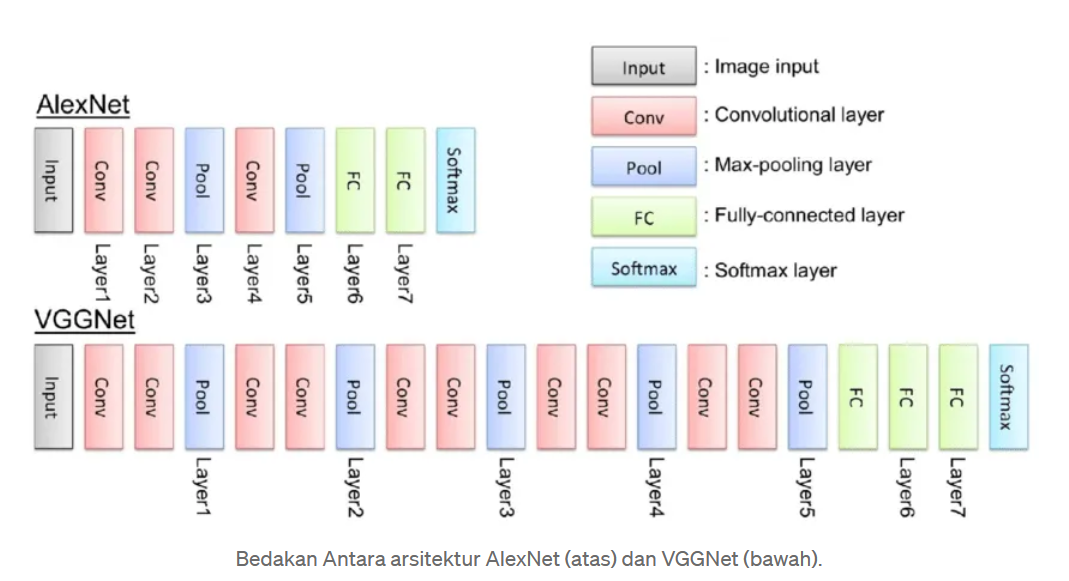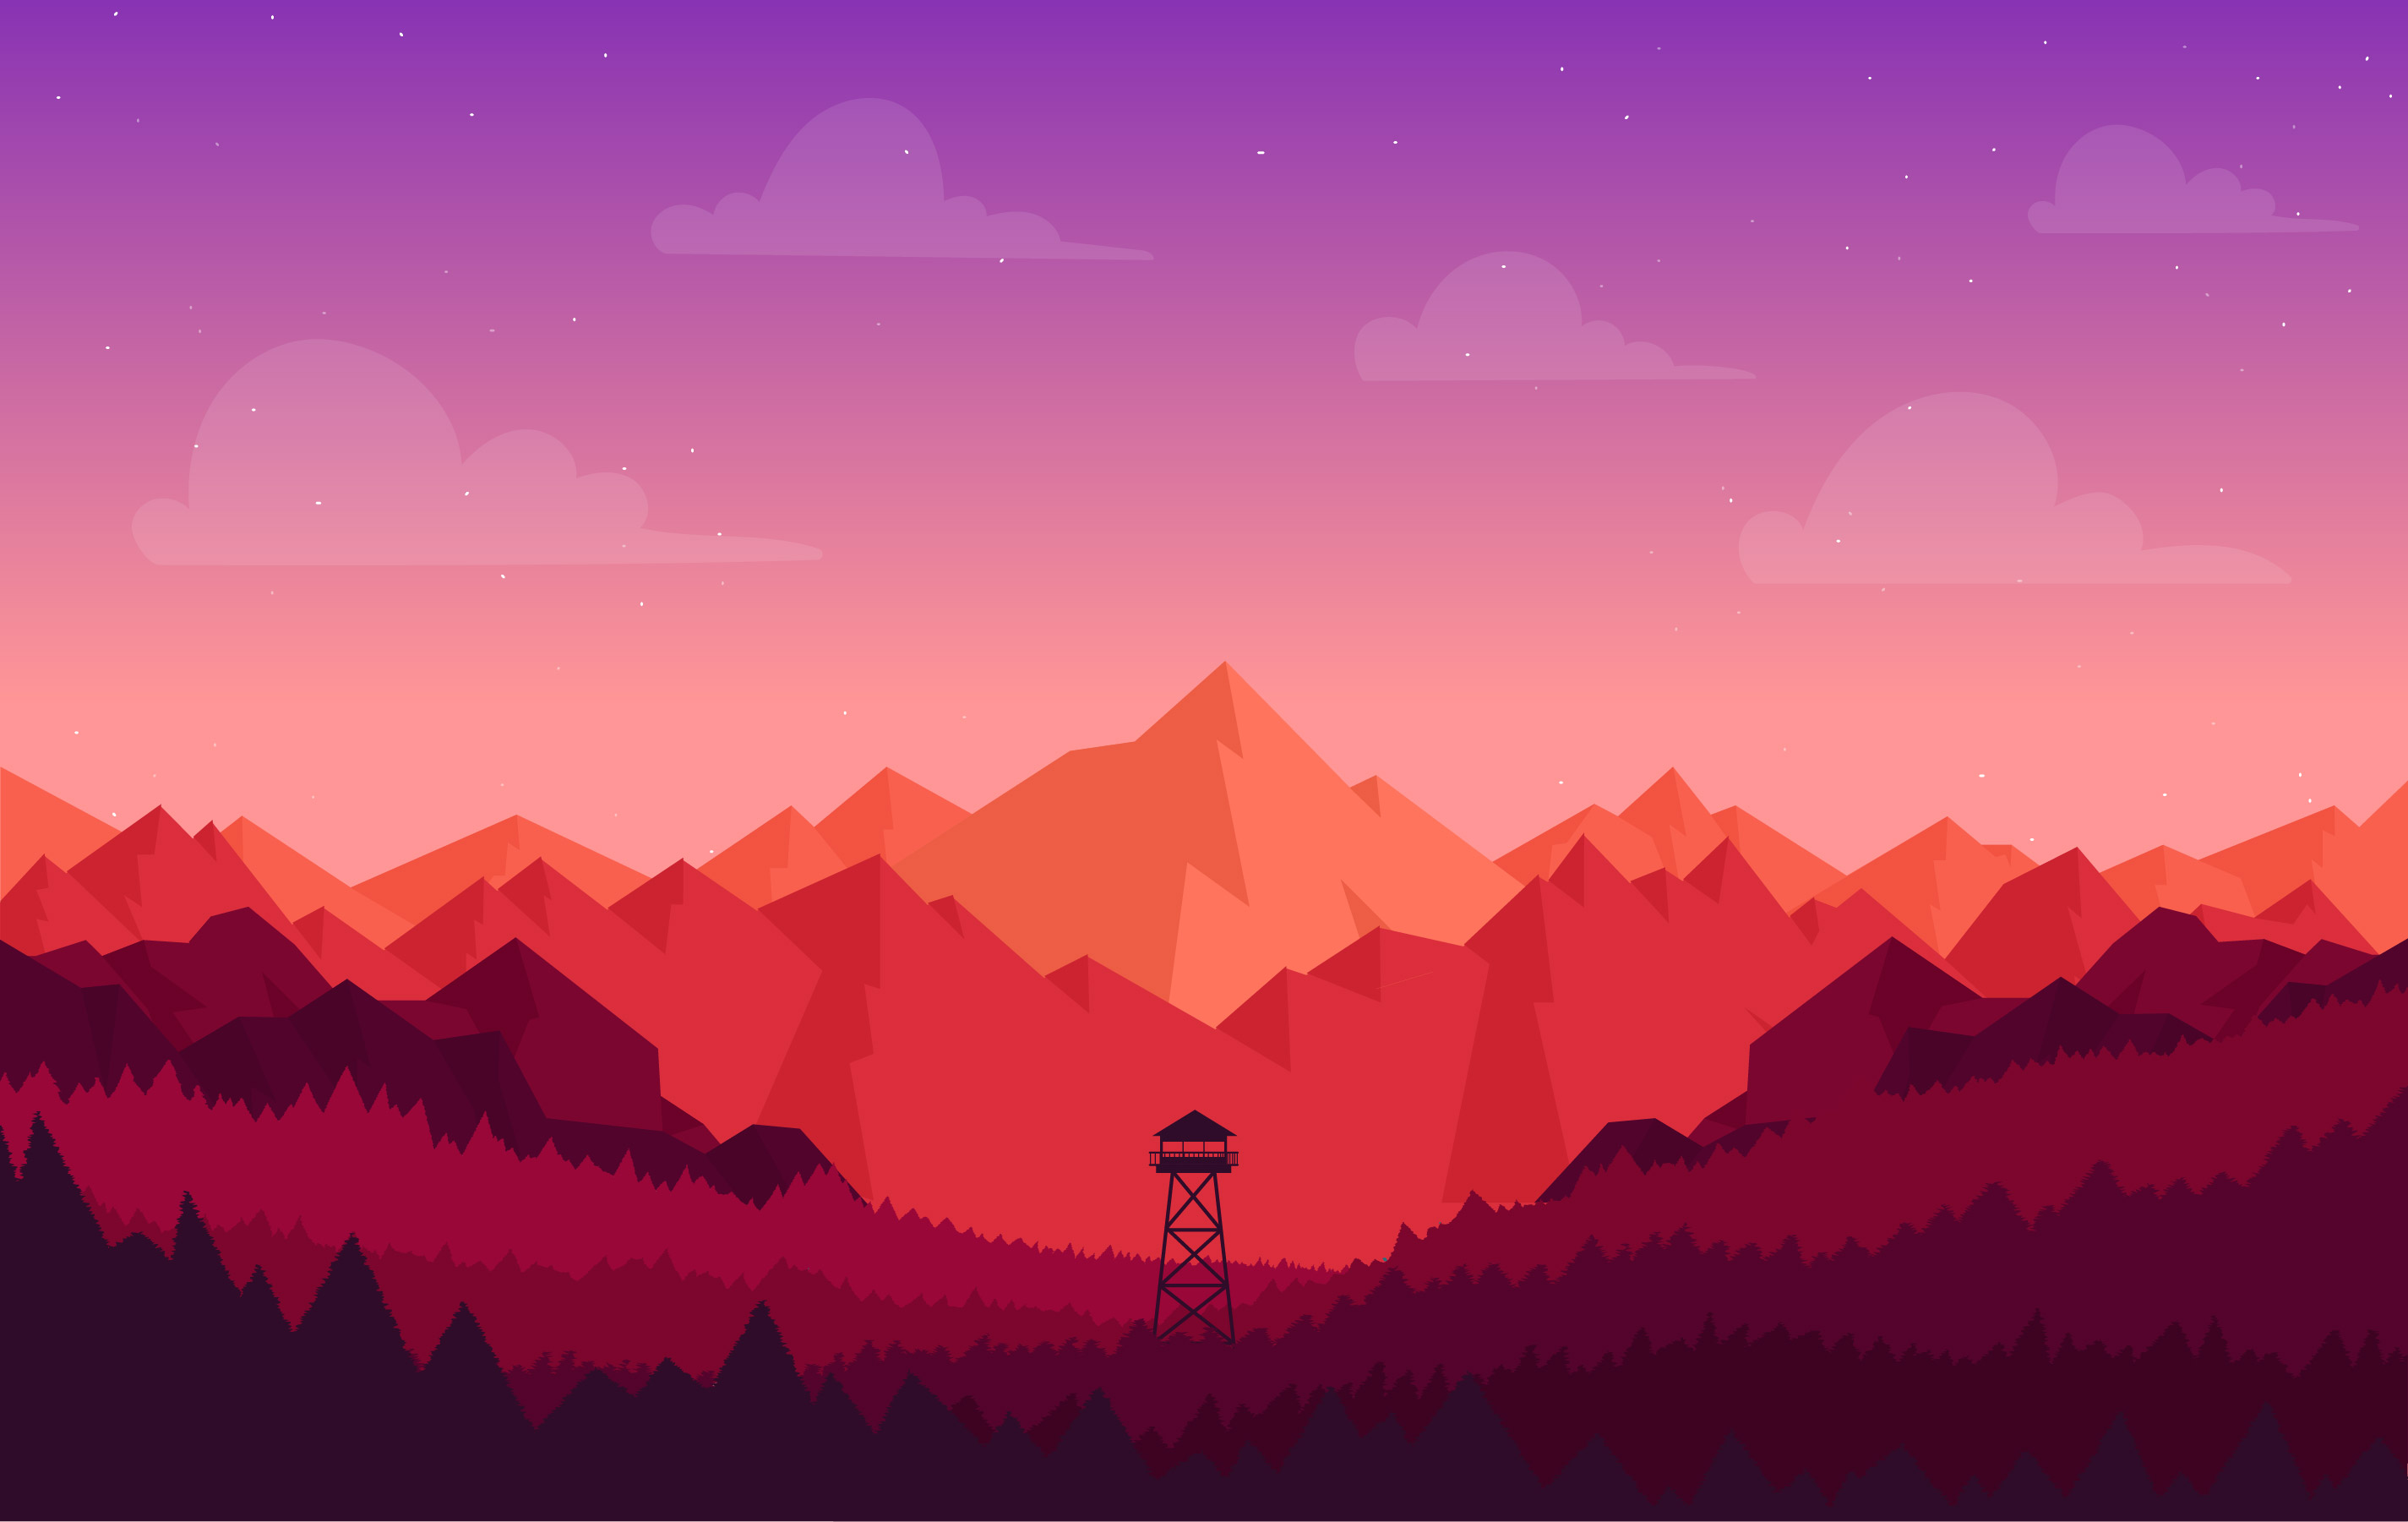)

- VGGNet-16 memiliki 16 lapisan dan dapat mengklasifikasikan foto ke dalam 1000 kategori objek berbeda, termasuk keyboard, hewan, pensil, mouse, dll., seperti dibahas di atas. Model ini juga menerima gambar dengan resolusi 224 x 224,7

untuk unfo lebih VGGNet-16: https://medium-com.translate.goog/@siddheshb008/vgg-net-architecture-explained-71179310050f?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=sc&_x_tr_hist=true


**VGG16.py**

In [ ]:
import inspect
import os

import numpy as np
import tensorflow as tf
import time

VGG_MEAN = [103.939, 116.779, 123.68]


class Vgg16:
    def __init__(self, vgg16_npy_path=None):
        if vgg16_npy_path is None:
            path = inspect.getfile(Vgg16)
            path = os.path.abspath(os.path.join(path, os.pardir))
            path = os.path.join(path, "vgg16.npy")
            vgg16_npy_path = path
            print(path)

        self.data_dict = np.load(vgg16_npy_path, encoding='latin1').item()
        print("npy file loaded")

    def build(self, rgb):
        """
        load variable from npy to build the VGG

        :param rgb: rgb image [batch, height, width, 3] values scaled [0, 1]
        """

        start_time = time.time()
        print("build model started")
        rgb_scaled = rgb * 255.0

        # Convert RGB to BGR
        red, green, blue = tf.split(axis=3, num_or_size_splits=3, value=rgb_scaled)
        assert red.get_shape().as_list()[1:] == [224, 224, 1]
        assert green.get_shape().as_list()[1:] == [224, 224, 1]
        assert blue.get_shape().as_list()[1:] == [224, 224, 1]
        bgr = tf.concat(axis=3, values=[
            blue - VGG_MEAN[0],
            green - VGG_MEAN[1],
            red - VGG_MEAN[2],
        ])
        assert bgr.get_shape().as_list()[1:] == [224, 224, 3]

        self.conv1_1 = self.conv_layer(bgr, "conv1_1")
        self.conv1_2 = self.conv_layer(self.conv1_1, "conv1_2")
        self.pool1 = self.max_pool(self.conv1_2, 'pool1')

        self.conv2_1 = self.conv_layer(self.pool1, "conv2_1")
        self.conv2_2 = self.conv_layer(self.conv2_1, "conv2_2")
        self.pool2 = self.max_pool(self.conv2_2, 'pool2')

        self.conv3_1 = self.conv_layer(self.pool2, "conv3_1")
        self.conv3_2 = self.conv_layer(self.conv3_1, "conv3_2")
        self.conv3_3 = self.conv_layer(self.conv3_2, "conv3_3")
        self.pool3 = self.max_pool(self.conv3_3, 'pool3')

        self.conv4_1 = self.conv_layer(self.pool3, "conv4_1")
        self.conv4_2 = self.conv_layer(self.conv4_1, "conv4_2")
        self.conv4_3 = self.conv_layer(self.conv4_2, "conv4_3")
        self.pool4 = self.max_pool(self.conv4_3, 'pool4')

        self.conv5_1 = self.conv_layer(self.pool4, "conv5_1")
        self.conv5_2 = self.conv_layer(self.conv5_1, "conv5_2")
        self.conv5_3 = self.conv_layer(self.conv5_2, "conv5_3")
        self.pool5 = self.max_pool(self.conv5_3, 'pool5')

        self.fc6 = self.fc_layer(self.pool5, "fc6")
        assert self.fc6.get_shape().as_list()[1:] == [4096]
        self.relu6 = tf.nn.relu(self.fc6)

        self.fc7 = self.fc_layer(self.relu6, "fc7")
        self.relu7 = tf.nn.relu(self.fc7)

        self.fc8 = self.fc_layer(self.relu7, "fc8")

        self.prob = tf.nn.softmax(self.fc8, name="prob")

        self.data_dict = None
        print(("build model finished: %ds" % (time.time() - start_time)))

    def avg_pool(self, bottom, name):
        return tf.nn.avg_pool(bottom, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name=name)

    def max_pool(self, bottom, name):
        return tf.nn.max_pool(bottom, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name=name)

    def conv_layer(self, bottom, name):
        with tf.variable_scope(name):
            filt = self.get_conv_filter(name)

            conv = tf.nn.conv2d(bottom, filt, [1, 1, 1, 1], padding='SAME')

            conv_biases = self.get_bias(name)
            bias = tf.nn.bias_add(conv, conv_biases)

            relu = tf.nn.relu(bias)
            return relu

    def fc_layer(self, bottom, name):
        with tf.variable_scope(name):
            shape = bottom.get_shape().as_list()
            dim = 1
            for d in shape[1:]:
                dim *= d
            x = tf.reshape(bottom, [-1, dim])

            weights = self.get_fc_weight(name)
            biases = self.get_bias(name)

            # Fully connected layer. Note that the '+' operation automatically
            # broadcasts the biases.
            fc = tf.nn.bias_add(tf.matmul(x, weights), biases)

            return fc

    def get_conv_filter(self, name):
        return tf.constant(self.data_dict[name][0], name="filter")

    def get_bias(self, name):
        return tf.constant(self.data_dict[name][1], name="biases")

    def get_fc_weight(self, name):
        return tf.constant(self.data_dict[name][0], name="weights")

**test VGG16**

In [ ]:
import numpy as np
import tensorflow as tf

import vgg16
import utils

img1 = utils.load_image("./test_data/tiger.jpeg")
img2 = utils.load_image("./test_data/puzzle.jpeg")

batch1 = img1.reshape((1, 224, 224, 3))
batch2 = img2.reshape((1, 224, 224, 3))

batch = np.concatenate((batch1, batch2), 0)

# with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.7)))) as sess:
with tf.device('/cpu:0'):
    with tf.Session() as sess:
        images = tf.placeholder("float", [2, 224, 224, 3])
        feed_dict = {images: batch}

        vgg = vgg16.Vgg16()
        with tf.name_scope("content_vgg"):
            vgg.build(images)

        prob = sess.run(vgg.prob, feed_dict=feed_dict)
        print(prob)
        utils.print_prob(prob[0], './synset.txt')
        utils.print_prob(prob[1], './synset.txt')

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load and preprocess the image
img_path = '/content/mbappe.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict the class of the image
preds = model.predict(x)

# Decode the predictions
decoded_preds = decode_predictions(preds, top=3)[0]  # top=3 untuk mendapatkan 3 kelas teratas
print('Predicted:', decoded_preds)


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n04118538', 'rugby_ball', 0.64692634), ('n03379051', 'football_helmet', 0.25545508), ('n04254680', 'soccer_ball', 0.097319804)]


## Googlenet
- dalam model ini kita akan melihat yang disebut dengan convolution 1 x 1 dimana fungsi dari convolusi ini adalah mengurangi komputasi dengan cara mengurangi channel mana yang penting dan mana yang kurang penting

- Tanpa convolusi 1x1
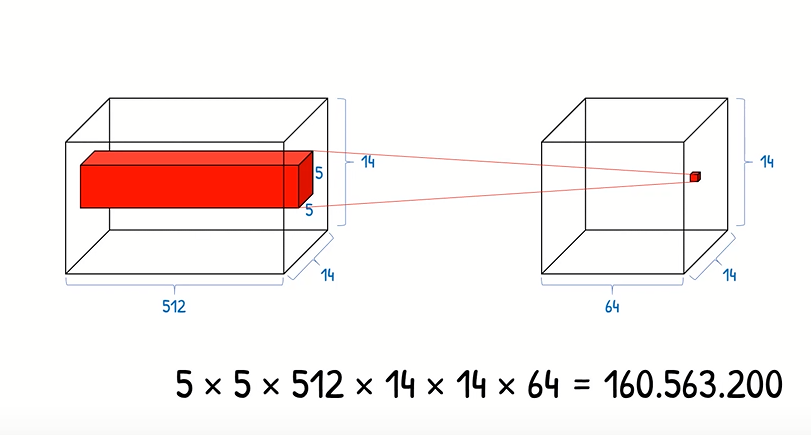

dengan konvolusi 1x1
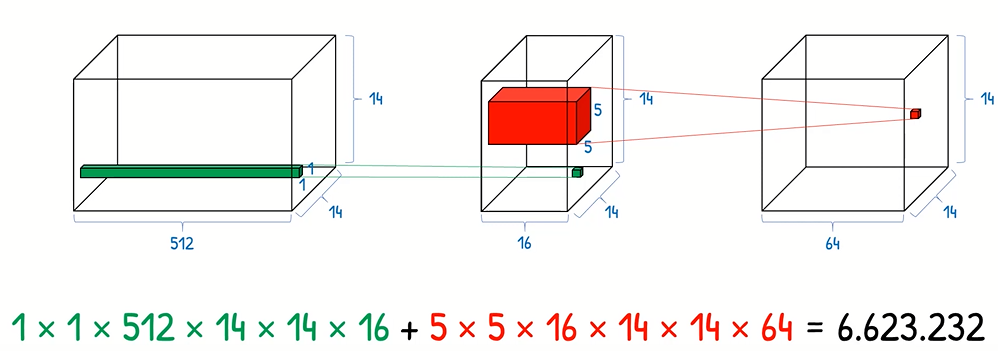

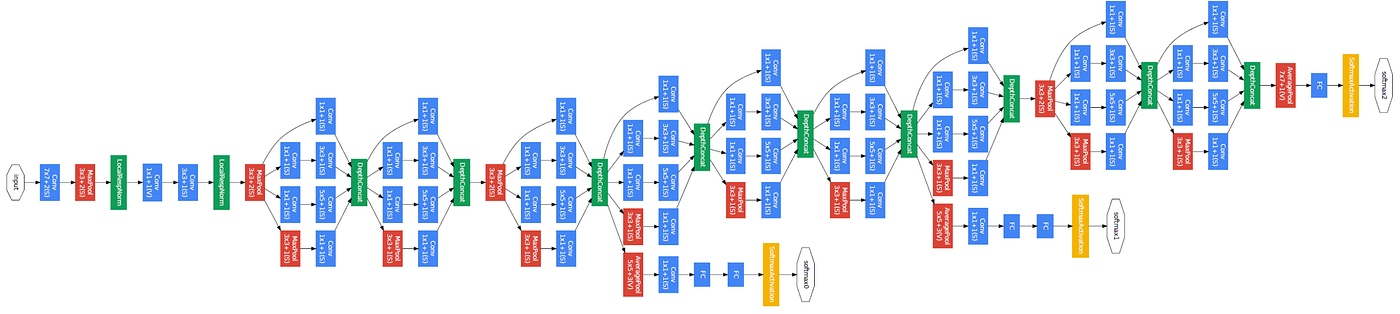

ket gambar diatas:
1. s =strike

- dalam architecture googlenet ada yang disebut lapisan inception module dimana ini adalah gabungan dari beberapa komponen cnn seperti conv,max dan nantinya akan di concanate , proses concanate disini adalah menjumlahkan semua lapisannnya ,

## Bab 5 Object Detection Models

- dalam bab ini akan diajarkan mengenai YOLO dan juga R-CNN

- Aplikasi dari objek detection
 - in self-driving cars untuk mendeteksi kendaraan dan pejalan kaki lain
 - untuk moderasi konten, untuk menemukan objek terlarang dan ukurannya masing-masing
 - untuk kesehatan
 - untuk kesehatan contohnya ketika ingin mendeteksi tumor
 - untuk manufactur pada robot
 - untuk keamanan industri contohnya mendeteksi banyak orang
 - untuk margasatwa dalam mendeteksi populasi hewan

- Teknik floating windows dalam objek deteksi melibatkan pembagian gambar menjadi serangkaian jendela tumpang tindih dan penggeseran serta penyesuaian ukuran jendela untuk secara sistematis menganalisis seluruh gambar dengan tujuan mendeteksi objek pada berbagai posisi dan skala. Setiap jendela kemudian dianalisis menggunakan model klasifikasi, seperti Convolutional Neural Networks (CNN), untuk menentukan apakah terdapat objek di dalamnya dan mengidentifikasi jenis objek tersebut. Teknik ini memungkinkan deteksi objek yang efektif dalam mengatasi variasi ukuran dan posisi objek dalam gambar, tetapi dapat menimbulkan beban komputasi yang tinggi, dan metode alternatif seperti anchor box dan Region Proposal Networks (RPN) telah dikembangkan untuk meningkatkan efisiensi.

## Resnet

- Pendahuluan : permasalah yang dihadapi oleh deep neural network diantaranya
  
  - **Masalah Gradient Hilang /meledak**  
    hal ini dapat terjadi ketika lapisan terlalu dalam dan terlalu besar,dan nilai inisialisasi bobot di bawah 1 sehingga jika dilakukan training maka bobot akan sangat kecil atau jika inisialisasi bobot lebih dari 1 maka akan terjadi letakan bobot karna sangat besar ini yang disebut gradien hilang /meledak

  - **Masalah Degradasi di jaringan neural**

    masalah degeadasi di jaringan saraf mengacu pada fenomena dimana ,ketika kedalaman jaringan saraf meningkat, kinerja jaringan pada data pelatihan menjadi jenuh dan kemudian mulai menurun

  - **Performa Plateu**

    Terjadi kejenuhan dalam training karna peningkatan lapisan
    
  - **Penurunan akurasi**
    
    sama saja dengan overfitting
    


- penjelasan output code dibawah ini adalah ,
    - 'n03770679': Ini adalah kode kelas yang terkait dengan gambar, dalam hal ini, itu mengacu pada jenis mobil, dalam kasus ini, minivan.
    - 'minivan': Ini adalah deskripsi kelas yang terkait dengan kode kelas tersebut, memberikan informasi lebih lanjut tentang kelas yang diprediksi.
    - 0.76622975: Ini adalah probabilitas prediksi, yang menunjukkan seberapa yakin model bahwa gambar tersebut adalah minivan. Probabilitas ini berada dalam rentang antara 0 dan 1, di mana semakin tinggi nilainya, semakin yakin model bahwa gambar tersebut adalah kelas yang diprediksi.

In [ ]:
import keras
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/mobil.jpeg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
decoded_predictions = decode_predictions(preds, top=3)[0]
decoded_predictions



1/1 [==============================] - 1s 1s/step


[('n03770679', 'minivan', 0.76622975),
 ('n02974003', 'car_wheel', 0.13526772),
 ('n03459775', 'grille', 0.020806367)]

## Komponen Utama Arsitektur ResNet

1. Blok sisa(Residual Block)
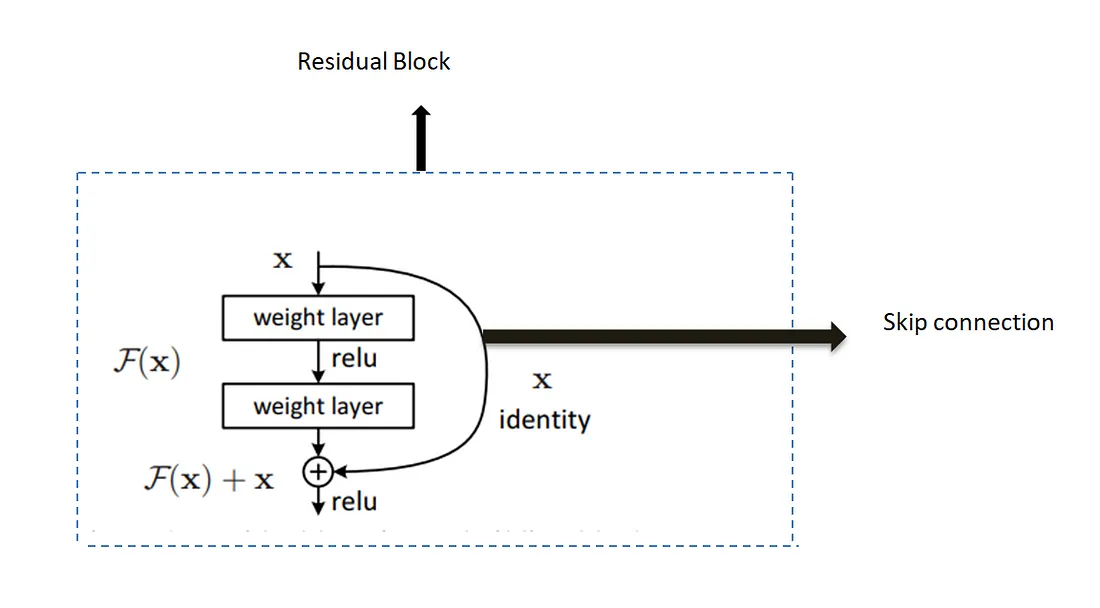

2. skip connection

  Lewati koneksi membantu dalam membentuk blok sisa. Koneksi lewati terdiri dari masukan blok sisa yang dilewati lapisan konvolusional dan ditambahkan ke keluaran blok sisa
3. stacked layers
  Arsitektur ResNet dibentuk dengan menumpuk beberapa blok sisa secara bersamaan. Dengan menggunakan beberapa blok sisa ini bersama-sama, arsitektur resnet dapat dibangun dengan sangat mendalam. Versi ResNet dengan 50.101.152 lapisan diperkenalkan
4. Global Average Pooling (Gap)
  Arsitektur Resnet biasanya menggunakan Global average Pooling sebagai lapisan terakhir sebelum lapisan yang terhubung sepenuhnya. GAP mengurangi dimensi spasial menjadi satu nilai per peta fitur yang memberikan representasi ringkas dari keseluruhan peta fitur

## Residual block with the Keras Function API

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, BatchNormalization, Add


def residual_block_basic(x,filters,kernel_size =3,strides =1):
  # Residual Path:
  conv_1 =Conv2D(filters =filters,kernel_size =kernel_size,strides =strides,padding ="same")(x)
  bn_1 =BatchNormalization(axis =-1)(conv_1)
  act_1 =Activation("relu")(bn_1)
  conv_2 =Conv2D(filters =filters,kernel_size=kernel_size,padding ="same",strides =strides)(act_1)
  residual =BatchNormalization(axis =-1)(conv_2)
  #shortcut Path:
  shortcut =x if strides ==1 else Conv2D(filters,kernel_size =1,padding ="valid",strides =strides)(x)
  #merge and return
  return Activation("relu")(add([shortcut,residual ]))

# Precision and recall

# Precision-recall curve


# Average preci


# Average Precision threshold
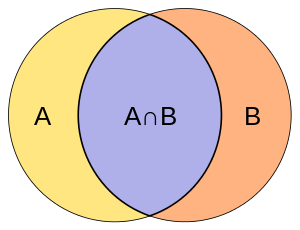, 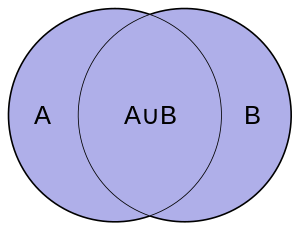1c4df392dda20f192d0db8de72c37b900985b899-1.svg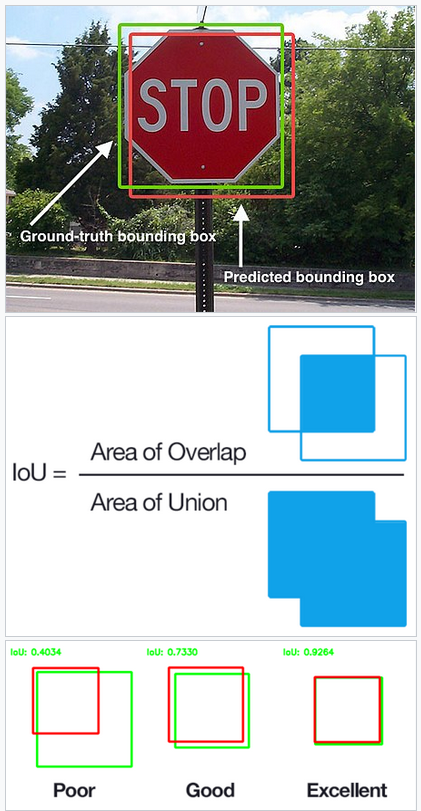

Jaccard Index atau IoU (Intersection over Union) sangat berguna untuk mengukur sejauh mana bounding box atau area segmentasi model deteksi objek sesuai dengan objek yang sebenarnya atau ground truth. IoU memberikan pengukuran presisi terkait dengan bounding box atau segmentasi objek, dan sering digunakan dalam tugas-tugas seperti deteksi objek dan segmentasi objek.dilihat dari persamaan diatas dapat terlihat bahwa rumusnya adalah perbandingan antara daerah perpotongan antara 2 daerah yaitu daerah prediksi box dan daerah sebenarnya dengan keseluruhan daerah jika IoU mendekati 1 berarti kotak tersebut sangat baik dalam menandai objek dan semakin bawah semakin buruk ia dalam mendeteksi box ke objek

# fast object detection algirithm (YOLO)
- yolo adalah salah satu tools object detection yang cukup cepat bahkan pada YOLOv3 bisa dirunning lebih dari 170 frames per second(FPs)

# Introducing YOLO
- yolo memiliki akurasi dan kecepatan yang besar

# kekuatan dan keterbatasan yolo
- yolo lebih mengungguli akurasi dari R-CNN dalam kecepatan tetapi ternyata lemah dalam mendeteksi objek yang lebih kecil atau sering disebut dengan struggles with smaller objects

# Yolo's main concepts
- konsep utama yolo bisa diandaikan seperti permasalah regrasi

- untuk setiap part pada grid, kita akan mendefinisikan B(B: Jumlah anchor boxes atau bounding boxes yang dihasilkan oleh setiap sel pada grid. Setiap anchor box memiliki parameter yang mencakup koordinat (x, y) relatif terhadap sel, lebar (width), tinggi (height), dan skor kepercayaan (confidence score)) bounding boxes, tugas kita akan memprediksi beberapa parametr bounding box
    - pusat dari bounding box berhubungan dengan titik x dan y
    - lebar dan tinggi dari box
    - probabilitas apakah box itu mengandung sebuah objek


# Infering with YOLO
- hanya menjelaskan bahwa dalam bab ini kita akan membagi menjadi 2 penjelasan yaitu ,inference dan training
- inference adalah proses mengambil image input dan menghitung result
-training proses belajar untuk mendapatkan weights pada model
pada model from scratch (scratch adalah bagaiaman kita membangun model dari awal hingga output) kita tidak bisa mennggunakan interference sebelum model di training

# The YOLO backbone
-  Backbone merujuk pada bagian utama dari arsitektur model yang bertanggung jawab untuk mengekstraksi fitur tingkat tinggi dari input. Backbone model sering kali bertanggung jawab untuk mengidentifikasi pola, fitur, dan representasi yang lebih kompleks dari data masukan.Backbone model biasanya terdiri dari beberapa lapisan (layer) konvolusional, normalisasi batch, fungsi aktivasi, dan mungkin juga blok residu atau modul lainnya. pada yolo ada Backbone CNN (feature extractor)

ukuran dari grid , w x h bergantung pada 2 faktor yaitu:

-

## Bab 6 Enchanging and segmentation Images

encoder-decoder banyak digunakan ke berbagai bidang contohnya :
- **image denoising** adalah proses penghapusan atau pengurangan noise dari gambar digital
- **semantic segmentation** adalah tugas visi komputer yang tujuannya adalah mengkategorikan setiap pixel dalam gambar ke dalam kelas atau objek
- Novel layers : jenis lapisan baru atau inovatif yang diperkenalkan dalam arsitektur jaringan syaraf

### Transforming images with encoders decoders
- Encoding and decoding
  - proses encoder-decoder banyak digunakan seperti pada bidang komunikasi,kriptografi,elektronik , dimana encoder akan menginputkan ke dalam laten space didalam space dan dikembalikan dengan decoder dimana inputanya bisa berupa gambar,video
  - dalam machine learning encoder decoder banyak digunakan dalam beberapa tujuan seperti text translation

### t-SNE

t-SNE(t-distributed stochastic neighbor embedding) adalah teknik reduksi dimensi non-linier tanpa pengawasan untuk eksplorasi data memvisualisasikan data berdimensi tinggi .Reduksi dimensi non-linier berarti bahwa algoritma ini memungkinkan kita untuk memisahkan data yang tidak dapat dipisahkan oleh garis lurus

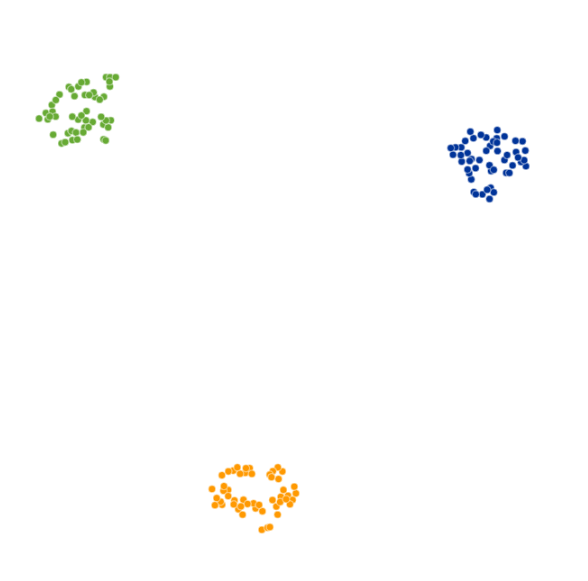

- t-SNE memberi Anda gambaran dan intuisi tentang bagaimana data disusun dalam dimensi yang lebih tinggi. Hal ini sering digunakan untuk memvisualisasikan kumpulan data yang kompleks menjadi dua dan tiga dimensi, memungkinkan kita untuk memahami lebih lanjut tentang pola dan hubungan yang mendasari data

- simplistic fully conected AE

In [ ]:
inputs =Input(shape =[img_height*img_width])
# Encoding layers
enc_1 =Dense(128,activation ="relu")(inputs)
code =Dense(64,activation ="relu")(enc_1)
# Decoding layers
dec_1 =Dense(64,activation ="relu")(code)
preds =Dense(128,activation ="sigmoid")(dec_1)
autoencoder =Model(inputs,preds)
#Training
autoencoder.compile(loss ="binary_crossentropy")
autoencoder.fit(X_train,X_train)

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

# Load dataset MNIST
(X_train, _), (_, _) = mnist.load_data()

# Normalisasi data
X_train = X_train.astype('float32') / 255.

# Reshape data menjadi vektor 1D
X_train = X_train.reshape((len(X_train), -1))

# Definisi model autoencoder
img_height, img_width = 28, 28
inputs = Input(shape=(img_height * img_width,))
enc_1 = Dense(128, activation='relu')(inputs)
code = Dense(64, activation='relu')(enc_1)
dec_1 = Dense(128, activation='relu')(code)
preds = Dense(img_height * img_width, activation='sigmoid')(dec_1)
autoencoder = Model(inputs, preds)

# Kompilasi model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Latih model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
235/235 [==============================] - 6s 21ms/step - loss: 0.2254
Epoch 2/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1286
Epoch 3/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1085
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1008
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0961
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0928
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0902
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0883
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0868
Epoch 10/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0856


In [ ]:
X_train.shape

(60000, 784)

In [ ]:
import matplotlib.pyplot as plt
import cv2
# Pilih beberapa gambar dari data latihan untuk ditampilkan
num_images = 10
sample_images = cv2.imread("/content/140310210015.JPG",0)
sample_images.shape

(1093, 984)

1/1 [==============================] - 0s 87ms/step


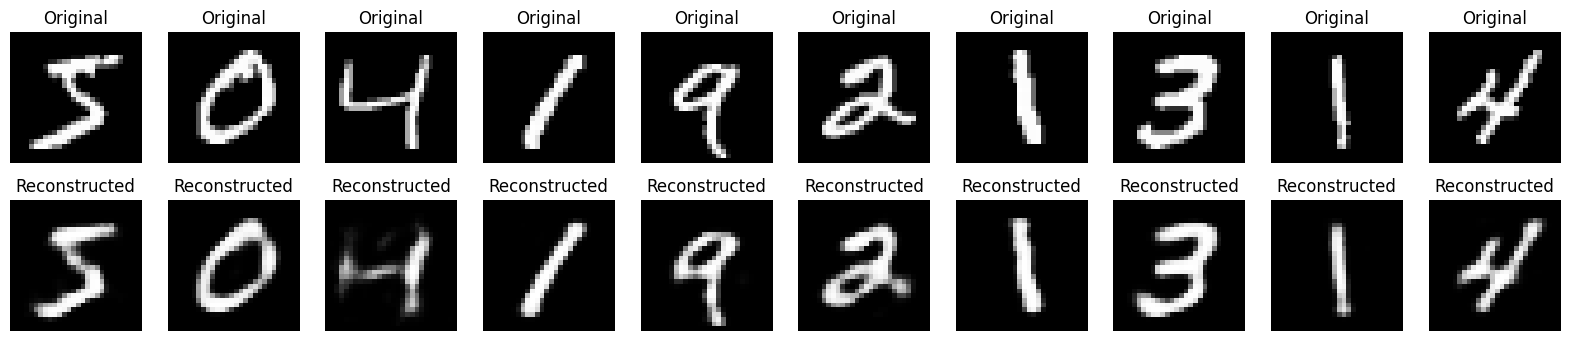

In [ ]:
import matplotlib.pyplot as plt

# Pilih beberapa gambar dari data latihan untuk ditampilkan
num_images = 10
sample_images = X_train[:num_images]

# Rekonstruksi gambar dengan autoencoder
reconstructed_images = autoencoder.predict(sample_images)

# Plot gambar asli dan gambar yang direkonstruksi
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Gambar asli
    plt.subplot(2, num_images, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Gambar yang direkonstruksi
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()


In [ ]:
X_noise =X_train+np.random.normal(loc =0,scale =.5,size =X_train.shape)
autoencoder.fit(X_noise,X_train)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.1267


1/1 [==============================] - 0s 43ms/step


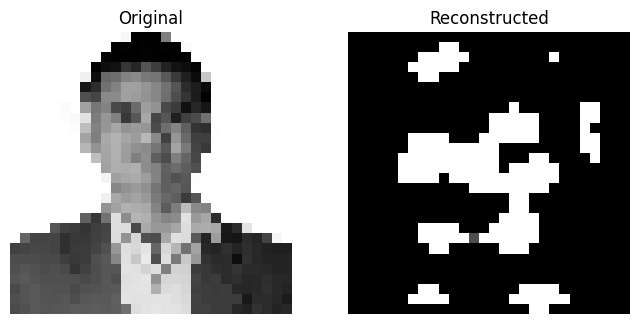

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load gambar
image = cv2.imread("/content/140310210015.JPG", 0)

# Resize gambar menjadi ukuran yang diharapkan oleh model autoencoder
image_resized = cv2.resize(image, (28, 28))

# Meratakan gambar menjadi vektor 1D
image_resized = image_resized.flatten()

# Tambahkan dimensi batch pada gambar yang diubah ukurannya
image_resized = np.expand_dims(image_resized, axis=0)

# Rekonstruksi gambar dengan autoencoder
reconstructed_image = autoencoder.predict(image_resized)

# Plot gambar asli dan gambar yang direkonstruksi
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_resized.reshape(28, 28), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.reshape(28, 28), cmap='gray')
plt.title('Reconstructed')
plt.axis('off')

plt.show()


## Convolutional encoders-encoders

- Kita mengetahui bahwa proses CNNs adalah proses yang berguna untuk ekstraksi feature maka dari itu proses ini dalam encoders-decoders disamakan dengan proses encoders , karna ada proses ekstraksi feature disitu sedangkan untuk proses decoder kita akan menggunakan proses Unpolping,transposing dan dilating atau kebalikan proses CNNs

**Unpolping,transposing,and dilating**
- unpooling biasanya digunakan untuk memperbesar dimensi spasial dari representasi yang telah dikurangi oleh pooling selama encoding. Ini membantu memulihkan detail spasial yang hilang selama proses encoding. Unpooling sering digunakan bersama dengan konvolusi transpose untuk memperluas representasi.
- Konvolusi transpose, yang melibatkan operasi transposisi, sering digunakan dalam lapisan decoder untuk memperluas representasi yang dikurangi oleh lapisan encoder. Ini membantu dalam membangun kembali data input dari representasi yang lebih rendah dimensi. Konvolusi transpose digunakan dalam lapisan dekonvolusi dari decoder.Balik lagi ke persamaan convolusi kita mengetahui bahwa shape tensor (ukuran gambar ) adalah (H,W,D) , dimana H =tinggi ,W =lebar dan D =depth(kedalaman)

  Ho =((H-k+2p)/s)+1 , Wo =((W-k+2p)/s)+1 , D =N
  ket : Ho =tinggi output,W0 =Lebar output,k =ukuran kernel ,p = padding D  =kedalaman input , N =Banyak nya kernel yang digunakan
  sehingga shape untuk output adalah (Ho,Wo,N)


karna kita mengetahui proses decoders encoders adalah kebalikan dari CNN sehingga kita akan melakukan operasi balik dari persamaan diatas menjadi

          H =(Ho-1)s +k-2p, W =(Wo-1)s+k-2p
Persamaan diatas yang disebut dengan **Transposed Convoutions** transposed Convolutions adalah type layer yang diusulkan oleh Zeiler dan fergus pada ZFNet

- untuk melakukan transposed convolution kita harus melakukan **dilation** dulu ,proses ini adalah menyelipkan angka 0 diantara data yang akan di decoder nilainya -

dalam tensorflow
transposed convolutions : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose

MaxUnpoling (max yang berlawanan dengan pooling ): https://www.tensorflow.org/addons/api_docs/python/tfa/layers/MaxUnpooling2D

Upsampling poling (mean yang berlawanan dengan mean pooling ) : https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D

operasi parameter dilatation ada di transposed convolutions

## Contoh penggunaan transpose

In [ ]:
import tensorflow as tf

# Misalkan kita memiliki input dengan ukuran (batch_size, height, width, channels)
input_shape = (32, 32, 3)

# Membuat model Sequential
model = tf.keras.Sequential()

# Menambahkan layer konvolusi transpose
model.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', input_shape=input_shape))

# Melihat ringkasan model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 64, 64, 64)        1792      
 anspose)                                                        
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Contoh penggunaan Upsampling

In [ ]:
import tensorflow as tf

# Misalkan kita memiliki input dengan ukuran (batch_size, height, width, channels)
input_shape = (None, 28, 28, 3)

# Membuat model Sequential
model = tf.keras.Sequential()

# Menambahkan layer upsampling
model.add(tf.keras.layers.UpSampling2D(size=(2, 2)))

# Melihat ringkasan model
model.build(input_shape=input_shape)
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 56, 56, 3)         0         
 D)                                                              
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##U-net

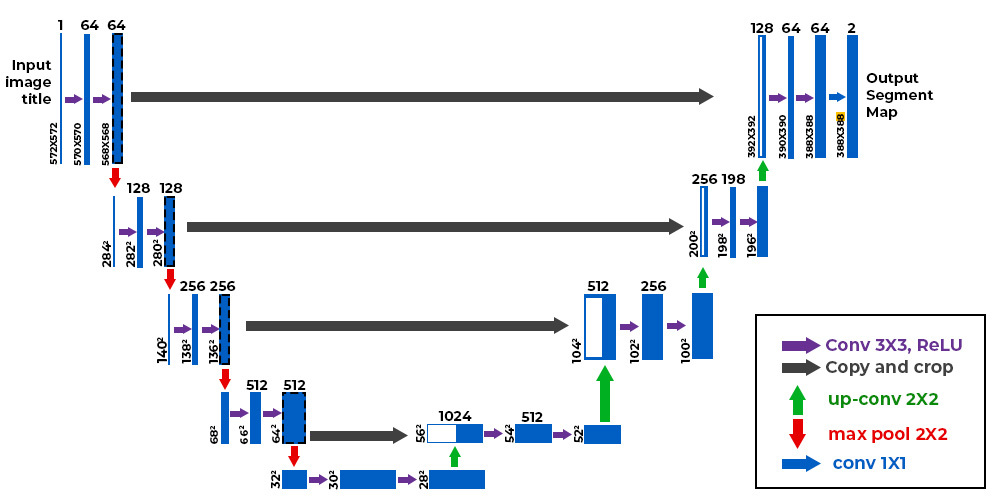

U-net bekerja dengan
1. kita tahu bahwa proses dari feature extraksion(encoders) adalah mengekstrak feature penting
2. lalu decoder akan mengembalikan hasil feature penting itu dan di U-net selain melakukan encoder decoder kita juga mencocokkan masing masing setiap hasil di encoder dan decoder
3. jadi tanda panah hitam (skip connection) diatas adalah pencocokan gambar setelah mengalami encoder dan decoder dia seperti di tempel antara hasil encoder dan decoder sehingga kita dapat melihat bagaimana proses segmentasi terjadi